# Pandas

## Agenda

* `Series`와 `DataFrame` 객체 소개
* `Series`와 `DataFrame`의 주요 도구: 인덱싱, 삭제, 연산, 정렬
* 기초 통계 활용

## 기본 설정

`pandas` 라이브러리는 보통 `pd` 라는 별칭으로 사용된다.

In [4]:
import pandas as pd
import numpy as np

In [3]:
# !pip install pandas

In [7]:
# https://pandas.pydata.org/docs/user_guide/index.html#user-guide
# https://product.kyobobook.co.kr/detail/S000201558138
pd.__version__

'2.2.2'

- `Series`와 `DataFrame`을 표로 보여줄 때 사용되는 행의 수 지정 가능 
- 기본 값은 60이다.

In [8]:
np.random.seed(1234)
pd.set_option("display.max_rows", 15)

## 1.1 판다스 자료구조 소개

* 시리즈(`Series`)
* 데이터프레임(`DataFrame`)

### 1.1.1 시리즈(`Series`)

- 1차원 어레이와 동일한 구조 
- 인덱스(index)를 0, 1, 2 등이 아닌 임의의 값으로 지정

#### 시리스 생성 1

- 1차원 리스트 또는 np.array를 이용해 생성가능
- index = 0, 1, 2, ... 으로 생성

- 참고
    - 인덱스: 별도로 지정하지 않으면 리스트, 넘파이 어레이 등에서 사용된 인덱스가 기본으로 사용됨.
    - `dtype`: 사용된 항목의 자료형을 가리키며 모든 항목은 동일한 자료형을 가져야 함. 

기본 Series 생성

In [9]:
ser_1 = pd.Series([2, 1, 3, -3])

In [10]:
ser_1 

0    2
1    1
2    3
3   -3
dtype: int64

In [12]:
ser_2 = pd.Series(np.array([2,1,3, -3]))

항목으로 사용된 값들은 `values` 속성이 넘파이 어레이로 저장된다.

In [13]:
ser_2.values

array([ 2,  1,  3, -3])

- series.index 를 통해 index확인 가능
- 자동으로 생성된 경우 인덱스는 `range`와 유사한 `RangeIndex` 자료형

In [14]:
ser_2.index

RangeIndex(start=0, stop=4, step=1)

#### 인덱스 지정
Series 생성시 index지정가능.

- `index` 키워드 인자: 항목의 수와 동일한 길이를 갖는 리스트. 리스트에 포함된 항목 순서대로 인덱스 지정.

In [16]:
ser_3 = pd.Series([2,3,1,-3], index=["b", "d", "c", "a"])

In [17]:
ser_3

b    2
d    3
c    1
a   -3
dtype: int64

In [18]:
ser_3.index

Index(['b', 'd', 'c', 'a'], dtype='object')

In [19]:
ser_3.values

array([ 2,  3,  1, -3], dtype=int64)

특정 인덱스를 지정시 인덱스의 자료형은 `Index` 객체로 할당된다.

In [21]:
type(ser_3.index)

pandas.core.indexes.base.Index

In [24]:
ser_3[1]

C:\Users\ohminy\AppData\Local\Temp\ipykernel_6508\2102774648.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ser_3[1]


3

In [29]:
ser_3.iloc[1] # 정수 인덱스를 기준으로 갖고 온다. 

3

In [30]:
ser_3.loc["a"] # index 기준

-3

#### 인덱스 대체
- 기존에 사용된 인덱스를 완전히 새로운 인덱스로 대체할 수도 있다.

In [33]:
ser_3.index = ["오영석", "오민엽", "이종찬", "김광열"]

In [34]:
ser_3

오영석    2
오민엽    3
이종찬    1
김광열   -3
dtype: int64

#### 인덱싱
- 숫자가 아닌 index도 동일하게 적용

In [35]:
ser_3[["오민엽", "오영석"]]

오민엽    3
오영석    2
dtype: int64

In [36]:
ser_3.loc[["오민엽", "오영석"]]

오민엽    3
오영석    2
dtype: int64

인덱스가 가리키는 값을 변경할 수도 있다.

In [38]:
ser_3.loc["오민엽"] = 1

In [39]:
ser_3

오영석    2
오민엽    1
이종찬    1
김광열   -3
dtype: int64

인덱스의 리스트를 이용한 인덱싱의 결과는 지정된 인덱스가 사용

In [40]:
ser_3.loc[["오민엽", "오민엽", "오영석"]]

오민엽    1
오민엽    1
오영석    2
dtype: int64

#### 부울 인덱싱(필터링)
- 부울 인덱싱은 넘파이 어레이의 경우와 동일하게 작동한다.


양수 항목들로만 구성된 시리즈 출력

In [41]:
ser_3 > 0

오영석     True
오민엽     True
이종찬     True
김광열    False
dtype: bool

In [42]:
ser_3[ser_3 > 0]

오영석    2
오민엽    1
이종찬    1
dtype: int64

#### 연산 및 유니버설 함수 적용
- 연산 및 유니버설 함수 적용 방식도 기본적으로 넘파이 어레이의 경우처럼 항목별로 작동

In [44]:
ser_3  + 3 

오영석    5
오민엽    4
이종찬    4
김광열    0
dtype: int64

In [48]:
ser_3 * 10

오영석    20
오민엽    10
이종찬    10
김광열   -30
dtype: int64

In [47]:
np.exp(ser_3) # 유니버설 함수 적용 가능 

오영석    7.389056
오민엽    2.718282
이종찬    2.718282
김광열    0.049787
dtype: float64

#### 사전(`dict`)과 시리즈(`Series`) 비교
- 시리즈는 길이가 고정되었으며 순서가 중요한 사전으로 간주할 수 있다.

| 사전 | 시리즈 |
| :---: | :---:  |
| 키(key) | 인덱스 |
| 값 | 값    |
| 순서 없음 | 순서 중요 |
| 중복 없음 | 중복 허용 |

In [49]:
data = {
    "a_1" : [1,2,3,4],
    "b_1" : [2,3,4,5]
}

df = pd.DataFrame(data)

In [51]:
df.index = [0, 1, 1, 2]

In [54]:
df.loc[1] # 인덱스 중복 허용 

,a_1,b_1
1,2,3
1,3,4


#### 시리즈 생성 2
dict2Series
- 키 => 인덱스
- 값 => 값

- dict 을 이용하여 index 별도 지정가능
     - dict에 키로 사용되지 않은 index는 누락되었다는 의미로 `NaN`이 표기
- 인덱스 리스트에 포함되지 않는 (사전의) 키는 포함되지 않는다.

* `California`: `sdata` 사전에 키로 사용되지 않았기에 `Nan`으로 지정
* `Utah`: `states` 리스트에 포함되지 않았기에 생성된 시리즈에 사용되지 않음.

In [78]:
sdata = {"Ohio": 3500, "Oregon":40000, "Texas":5400, "Utah":3200}

In [79]:
ser_4 = pd.Series(sdata)

In [80]:
ser_4

Ohio       3500
Oregon    40000
Texas      5400
Utah       3200
dtype: int64

In [81]:
states = ["California", "Ohio", "Oregon", "Texas"]

In [82]:
ser_5 = pd.Series(sdata, index = states)

In [83]:
type(ser_5.iloc[0])

numpy.float64

In [84]:
# 값이 없다. 비워둠
np.NaN?

Type:        float
String form: nan
Docstring:   Convert a string or number to a floating point number, if possible.

역으로 시리즈를 사전으로 변환할 수도 있다. 

* 인덱스 => 키
* 값 => 값

In [85]:
ser_5.to_dict()

{'California': nan, 'Ohio': 3500.0, 'Oregon': 40000.0, 'Texas': 5400.0}

#### `in` 연산자
- `in`연산자는 인덱스 사용 여부를 사전 자료형의 키(key) 사용 여부와 동일한 방식으로 판단한다.

In [86]:
"Ohio" in ser_5

True

In [87]:
"korea" in ser_5

False

In [88]:
"Utha" in ser_5

False

In [90]:
ser_5

California        NaN
Ohio           3500.0
Oregon        40000.0
Texas          5400.0
dtype: float64

In [91]:
"Utah" in ser_4

True

#### 결측치 확인
- isnull
    - 누락된 항목은 `True`, 아니면 `False`로 지정하여 단번에 결측치가 포함되었는지 여부를 보여준다
- notnull
    - 누락된 항목은 `False`, 아니면 `True`로 지정하여 단번에 결측치가 포함되었는지 여부를 보여준다.

In [93]:
ser_5[pd.isnull(ser_5)]

California   NaN
dtype: float64

In [95]:
pd.notnull(ser_5)d

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [94]:
ser_5[pd.notnull(ser_5)]

Ohio       3500.0
Oregon    40000.0
Texas      5400.0
dtype: float64

- `any()` 또는 `all()` 메서드를 활용하면 결측치 여부 확인가능
- 예를 들어, `pd.isnull()` 과 `any()` -> `True` 결측치 존재

In [97]:
np.any(ser_5.isnull())

True

In [99]:
np.all(ser_5.notnull())

False

- `pd.notnull()` 과 `all()` -> `False` 이면 결측재 존재

#### 시리즈 연산과 인덱스

- 시리즈가 공동으로 사용하는 항목에 대해서만 연산가능
- 다른 인덱스에 대한 연산결과로는 `NaN`으로 값 지정

In [102]:
ser_6= pd.Series(sdata)

In [103]:
ser_6 

Ohio       3500
Oregon    40000
Texas      5400
Utah       3200
dtype: int64

In [104]:
ser_5

California        NaN
Ohio           3500.0
Oregon        40000.0
Texas          5400.0
dtype: float64

In [105]:
ser_6 + ser_5

California        NaN
Ohio           7000.0
Oregon        80000.0
Texas         10800.0
Utah              NaN
dtype: float64

## 1.2 데이터프레임(`DataFrame`)

__데이데프레임__(DataFrame) 
- 인덱스를 공유하는 여러 개의 시리즈를 다루는 객체다. 
- 2차원 Array, Matrix 라고 하기도 한다.
- row 와 column으로 구성, Series 는 row vector 라고 하기도 한다

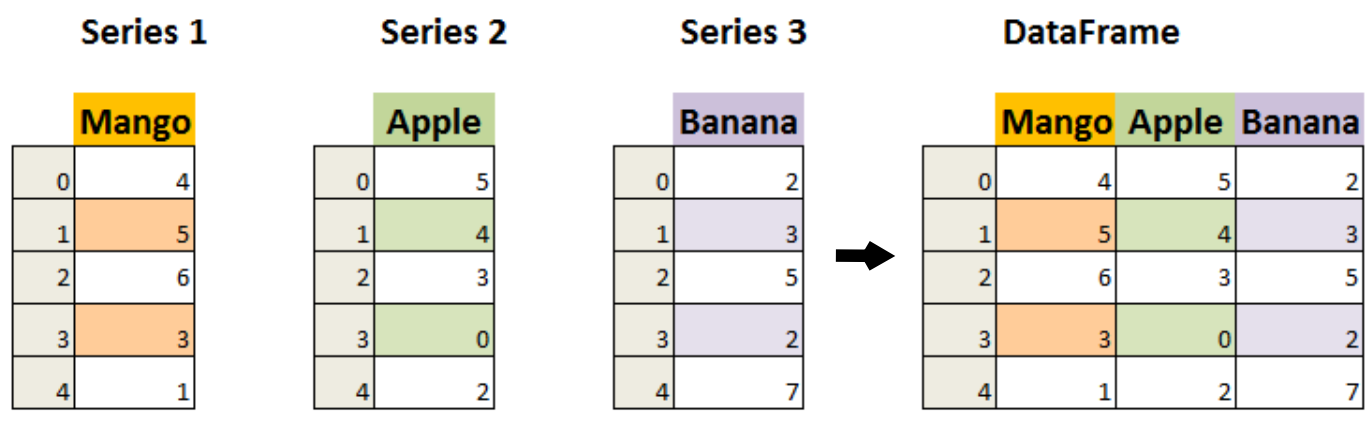

- 세 개의 시리즈
- `name` 속성을 이용하여 각 시리즈의 이름도 함께 지정

In [108]:
series_1 = pd.Series([4,5,6,3,1], name="Mango")
series_2 = pd.Series([5,4,3,0,2], name="Apple")
series_3 = pd.Series([2,3,5,2,7], name="Banana")

### 데이터프레임 생성 1 (From a dict of lists)

- value 가  list인 dict 으로 부터 데이터 프레임 생성
- 데이터프레임 객체는 시리즈를 값으로 갖는 사전(`dict`) 객체를 이용하여 생성가능
- 위 세 개의 시리즈를 하나의 데이터프레임으로 묶기 위해 키(key)는 각 series `name`으로, 값(value)은 해당 series로 지정된 아래 사전을 이용한다.

```python
{"Mango":series1, "Apple":series2, "Banana":series3}
```

- `name` 속성을 키로 지정한 후 데이터프레임 생성

In [110]:
pd.DataFrame({"Mango":series_1, "Apple":series_2, "Banana":series_3})

,Mango,Apple,Banana
0,4,5,2
1,5,4,3
2,6,3,5
3,3,0,2
4,1,2,7


- `pd.concat()` 함수도 여러 개의 시리즈를 묶어 하나의 데이터프레임을 생성
    - 축 지정
    - axis=1, axis=0

In [115]:
df = pd.concat([series_1, series_2, series_3], axis = 1 )

In [117]:
df.shape

(5, 3)

### 데이터프레임 생성 2 (From a list of dicts)
- Object가 dict인 list로부터 데이터 프레임 생성
- 리스트를 값으로 갖는 사전을 이용하여 데이터프레임을 생성 가능
- `state`(주 이름), `year`(년도), `pop`(인구)을 키(key)로 사용
- 해당 특성에 해당하는 데이터로 구성된 리스트를 값(value)로 사용

In [118]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada', 'NY', 'NY', 'NY'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003, 2002, 2003, 2004],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2, 8.3, 8.4, 8.5]}
# dict 를 DataFrame로 변경해보자

In [119]:
df_1 = pd.DataFrame(data)

In [120]:
df_1

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2
6,NY,2002,8.3
7,NY,2003,8.4
8,NY,2004,8.5


#### `head()` 메서드
- `head()` : 지정된 크기만큼의 행을 출력 
- 처음 5개의 행을 보여준다.

In [122]:
df_1.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [124]:
df_1.head(3)

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6


#### `tail()` 메서드
- `tail()` : 지정된 크기만큼의 행을 뒤에서부터 출력 
- 뒤에서부터 5개의 행을 보여준다.

In [125]:
df_1.tail(3)

,state,year,pop
6,NY,2002,8.3
7,NY,2003,8.4
8,NY,2004,8.5


In [129]:
df.iloc[int(len(df_1)/2)]

Mango     1
Apple     2
Banana    7
Name: 4, dtype: int64

### 데이터프레임 생성3 (From another DataFrame)
- `columns` 속성을 이용하여 열의 순서를 지정하여 기존 datafram을 이용해 새로운 datafram을 생성할 수 있다. 

In [134]:
pd.DataFrame(data)

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2
6,NY,2002,8.3
7,NY,2003,8.4
8,NY,2004,8.5


In [131]:
pd.DataFrame(data, columns = ["year", "pop", "state"])

,year,pop,state
0,2000,1.5,Ohio
1,2001,1.7,Ohio
2,2002,3.6,Ohio
3,2001,2.4,Nevada
4,2002,2.9,Nevada
5,2003,3.2,Nevada
6,2002,8.3,NY
7,2003,8.4,NY
8,2004,8.5,NY


- 새로운 열을 추가 가능
- 이름만 지정하고 value가 없다면 항목은 모두 `NaN`으로 처리

In [136]:
df_2 = pd.DataFrame(data, columns = ["year", "pop", "state", "debt"])

In [137]:
df_2

,year,pop,state,debt
0,2000,1.5,Ohio,NaN
1,2001,1.7,Ohio,NaN
2,2002,3.6,Ohio,NaN
3,2001,2.4,Nevada,NaN
4,2002,2.9,Nevada,NaN
5,2003,3.2,Nevada,NaN
6,2002,8.3,NY,NaN
7,2003,8.4,NY,NaN
8,2004,8.5,NY,NaN


- 사전에 항목을 추가하듯이 처리 가능

In [139]:
df_2_= df_2.copy()

 - `columns` 속성을 확인

In [142]:
df_2_.columns

Index(['year', 'pop', 'state', 'debt'], dtype='object')

#### `index` 속성
- 인덱스를 지정하려면 `index` 속성을 이용

In [143]:
df_2_.index = ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]

In [146]:
df_2_.index[1:3]

Index(['two', 'three'], dtype='object')

In [144]:
df_2_

,year,pop,state,debt
one,2000,1.5,Ohio,NaN
two,2001,1.7,Ohio,NaN
three,2002,3.6,Ohio,NaN
four,2001,2.4,Nevada,NaN
five,2002,2.9,Nevada,NaN
six,2003,3.2,Nevada,NaN
seven,2002,8.3,NY,NaN
eight,2003,8.4,NY,NaN
nine,2004,8.5,NY,NaN


In [150]:
df_2_.reset_index(inplace=True) #  inplace=True : df_2_ 의 객체 정보변경 

In [151]:
df_2_

,index,year,pop,state,debt
0,one,2000,1.5,Ohio,NaN
1,two,2001,1.7,Ohio,NaN
2,three,2002,3.6,Ohio,NaN
3,four,2001,2.4,Nevada,NaN
4,five,2002,2.9,Nevada,NaN
5,six,2003,3.2,Nevada,NaN
6,seven,2002,8.3,NY,NaN
7,eight,2003,8.4,NY,NaN
8,nine,2004,8.5,NY,NaN


In [155]:
df_2_.set_index("pop", inplace=True)

In [156]:
df_2_

,index,year,state,debt
pop,,,,
1.5,one,2000,Ohio,NaN
1.7,two,2001,Ohio,NaN
3.6,three,2002,Ohio,NaN
2.4,four,2001,Nevada,NaN
2.9,five,2002,Nevada,NaN
3.2,six,2003,Nevada,NaN
8.3,seven,2002,NY,NaN
8.4,eight,2003,NY,NaN
8.5,nine,2004,NY,NaN


In [157]:
df_2_["year"]

pop
1.5    2000
1.7    2001
3.6    2002
2.4    2001
2.9    2002
3.2    2003
8.3    2002
8.4    2003
8.5    2004
Name: year, dtype: int64

In [158]:
df_2_.year

pop
1.5    2000
1.7    2001
3.6    2002
2.4    2001
2.9    2002
3.2    2003
8.3    2002
8.4    2003
8.5    2004
Name: year, dtype: int64

In [160]:
df_3 = pd.DataFrame(data, columns = ["year", "pop", "state", "debt", "date time"])

In [163]:
df_3.state

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
6        NY
7        NY
8        NY
Name: state, dtype: object

In [162]:
df_3.date time # 띄어쓰기 때문에 동작x

SyntaxError: invalid syntax (3740516406.py, line 1)

- `columns`, `index` 등 여러 속성을 동시에 지정

### 열(column) 인덱싱

- 열 인덱싱은 시리즈, 사전 등과 동일한 방식을 사용
- 지정된 열의 이름을 사용하여 확인가능
```
df[‘column_name’]
```

In [164]:
df_2.state =="Ohio"

0     True
1     True
2     True
3    False
4    False
5    False
6    False
7    False
8    False
Name: state, dtype: bool

In [165]:
df_2["Ohio state"] = df_2.state =="Ohio"

In [166]:
df_2

,year,pop,state,debt,date time,Ohio state
0,2000,1.5,Ohio,NaN,NaN,True
1,2001,1.7,Ohio,NaN,NaN,True
2,2002,3.6,Ohio,NaN,NaN,True
3,2001,2.4,Nevada,NaN,NaN,False
4,2002,2.9,Nevada,NaN,NaN,False
5,2003,3.2,Nevada,NaN,NaN,False
6,2002,8.3,NY,NaN,NaN,False
7,2003,8.4,NY,NaN,NaN,False
8,2004,8.5,NY,NaN,NaN,False


- 대괄호 대신 속성 형식을 사용할 수도 있다.
```
df.column_name
```

In [167]:
df_2.state

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
6        NY
7        NY
8        NY
Name: state, dtype: object

In [168]:
df_2.Ohio state

SyntaxError: invalid syntax (3964789769.py, line 1)

In [169]:
df_2."Ohio state"

SyntaxError: invalid syntax (4178417154.py, line 1)

In [170]:
df_2["Ohio state"]

0     True
1     True
2     True
3    False
4    False
5    False
6    False
7    False
8    False
Name: Ohio state, dtype: bool

__참고__ 
- 속성 형식에 사용될 수 있는 열의 이름은 일반 변수의 이름 지정방식과 동일하게 사용해야 한다. 
- 대괄호를 사용하는 인덱싱은 임의의 문자열을 사용하지만 속성 형식은 변수를 사용하듯이 처리하기 때문 

예 
- Ohio 주(state)인지 여부를 판정하는 'Ohio state' 라는 열을 추가

### 전치 데이터프레임
- 2차원 행렬의 전치 행렬처럼 전치 데이터프레임은 행과 열의 위치를 변경한다.

In [171]:
df_2

,year,pop,state,debt,date time,Ohio state
0,2000,1.5,Ohio,NaN,NaN,True
1,2001,1.7,Ohio,NaN,NaN,True
2,2002,3.6,Ohio,NaN,NaN,True
3,2001,2.4,Nevada,NaN,NaN,False
4,2002,2.9,Nevada,NaN,NaN,False
5,2003,3.2,Nevada,NaN,NaN,False
6,2002,8.3,NY,NaN,NaN,False
7,2003,8.4,NY,NaN,NaN,False
8,2004,8.5,NY,NaN,NaN,False


In [172]:
df_2.T #view 만 반환 한다. 

,0,1,2,3,4,5,6,7,8
year,2000,2001,2002,2001,2002,2003,2002,2003,2004
pop,1.5,1.7,3.6,2.4,2.9,3.2,8.3,8.4,8.5
state,Ohio,Ohio,Ohio,Nevada,Nevada,Nevada,NY,NY,NY
debt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ohio state,True,True,True,False,False,False,False,False,False


In [174]:
df_2.transpose()

,0,1,2,3,4,5,6,7,8
year,2000,2001,2002,2001,2002,2003,2002,2003,2004
pop,1.5,1.7,3.6,2.4,2.9,3.2,8.3,8.4,8.5
state,Ohio,Ohio,Ohio,Nevada,Nevada,Nevada,NY,NY,NY
debt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ohio state,True,True,True,False,False,False,False,False,False


### `name`/`values` 속성
- Series 경우와 동일한 방식으로 행과 열의 이름을 지정 가능
- 항목들로 이루어진 2차원 어레이는 `values` 속성이 가리킨다.

In [175]:
df_2

,year,pop,state,debt,date time,Ohio state
0,2000,1.5,Ohio,NaN,NaN,True
1,2001,1.7,Ohio,NaN,NaN,True
2,2002,3.6,Ohio,NaN,NaN,True
3,2001,2.4,Nevada,NaN,NaN,False
4,2002,2.9,Nevada,NaN,NaN,False
5,2003,3.2,Nevada,NaN,NaN,False
6,2002,8.3,NY,NaN,NaN,False
7,2003,8.4,NY,NaN,NaN,False
8,2004,8.5,NY,NaN,NaN,False


## 1.3 인덱스 객체

### `index` 속성
- 시리즈와 데이터프레임의 인덱스는 `Index` 속성값으로 지정

In [178]:
df_2.index

RangeIndex(start=0, stop=9, step=1)

In [179]:
df_2.index.name = "index_name"

In [180]:
df_2.index.name

'index_name'

- 인덱스 객체는 1차원 어레이와 유사하게 동작
- 예를 들어, 인덱싱과 슬라이싱은 리스트 또는 1차원 어레이의 경우와 동일하게 작동

In [181]:
df_2.index

RangeIndex(start=0, stop=9, step=1, name='index_name')

In [183]:
df_2.reset_index()

,index_name,year,pop,state,debt,date time,Ohio state
0,0,2000,1.5,Ohio,NaN,NaN,True
1,1,2001,1.7,Ohio,NaN,NaN,True
2,2,2002,3.6,Ohio,NaN,NaN,True
3,3,2001,2.4,Nevada,NaN,NaN,False
4,4,2002,2.9,Nevada,NaN,NaN,False
5,5,2003,3.2,Nevada,NaN,NaN,False
6,6,2002,8.3,NY,NaN,NaN,False
7,7,2003,8.4,NY,NaN,NaN,False
8,8,2004,8.5,NY,NaN,NaN,False


### `columns` 속성
- 열(columns)에 사용된 이름은 `Index` 객체로 `columns` 속성값으로 지정


In [186]:
df_2.columns.name = "col_name"

In [187]:
df_2

col_name,year,pop,state,debt,date time,Ohio state
index_name,,,,,,
0,2000,1.5,Ohio,NaN,NaN,True
1,2001,1.7,Ohio,NaN,NaN,True
2,2002,3.6,Ohio,NaN,NaN,True
3,2001,2.4,Nevada,NaN,NaN,False
4,2002,2.9,Nevada,NaN,NaN,False
5,2003,3.2,Nevada,NaN,NaN,False
6,2002,8.3,NY,NaN,NaN,False
7,2003,8.4,NY,NaN,NaN,False
8,2004,8.5,NY,NaN,NaN,False


### `in` 연산자
- 인덱스와 열에 대한 특정 이름의 사용 여부는 `in` 연산자를 이용하여 확인

In [189]:
"state" in df_2.columns

True

In [191]:
3 in df_2.index

True

### 중복 인덱스
- 인덱스를 중복해서 사용 가능

In [192]:
ind_obj2 = pd.Index(["one", 
                     "two",
                     "three",
                     "three",-
                     "one"])